<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/PhD_Work_Creativity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Guide to Creativity and Machine Learning

### Creativity mostly done through Generative Models

Task: Text Generation 



#LSTM

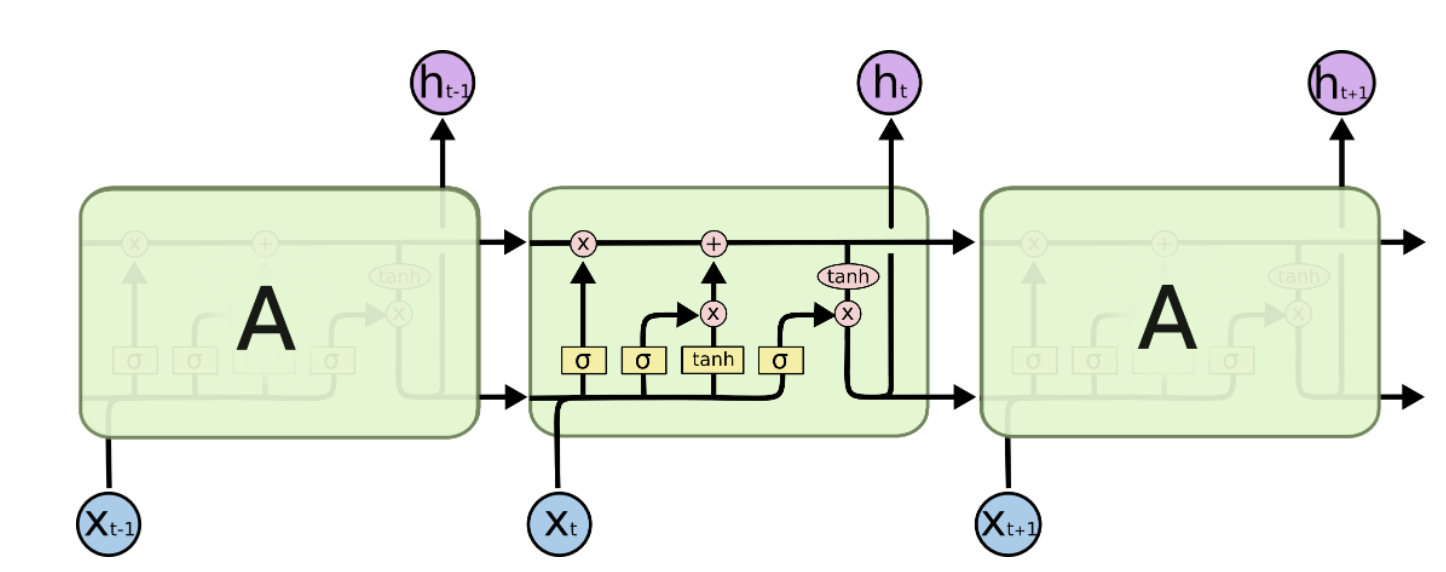

#Dataset

Articles April - 2017 





In [ ]:
import pandas 

In [ ]:
text_csv= pandas.read_csv("/content/sample_data/mnist_train_small.csv")

df=pandas.DataFrame(text_csv)

df.describe()

6        0      0.1      0.2      0.3      0.4      0.5  \
count  19999.000000  19999.0  19999.0  19999.0  19999.0  19999.0  19999.0   
mean       4.470124      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.892807      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           0.6      0.7      0.8  ...         0.581         0.582  \
count  19999.0  19999.0  19999.0  ...  19999.000000  19999.000000   
mean       0.0      0.0      0.0  ...      0.215011      0.087704   
std        0.0      0.0      0.0  ...      6.314821      3.921664   
min        0.0      0.0      0.0  ...      0.000000      0.000000   
25%        0.0      0.0      0.0  ...      0.000000      0.000000   
50%        0.0      0.0      0.0  ...      0.000000      0.000000   
75%        0.0      0.0      0.0  ...      0.000000      0.000000   
max        0.0      0.0      0.0  ...    253.000000    254.000000   

              0.583         0.584         0.585         0.586    0.587  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.0   
mean       0.036502      0.013651      0.032602      0.006000      0.0   
std        2.712527      0.950818      2.718102      0.600333      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        0.000000      0.000000      0.000000      0.000000      0.0   
max      253.000000     79.000000    254.000000     62.000000      0.0   

         0.588    0.589    0.590  
count  19999.0  19999.0  19999.0  
mean       0.0      0.0      0.0  
std        0.0      0.0      0.0  
min        0.0      0.0      0.0  
25%        0.0      0.0      0.0  
50%        0.0      0.0      0.0  
75%        0.0      0.0      0.0  
max        0.0      0.0      0.0  

[8 rows x 785 columns]

In [ ]:
df[1:100]

6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
1   7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2   9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3   5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4   2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
5   0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
.. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
95  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
96  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
97  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
98  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
99  7  0    0    0    0    0    0    0    0    0  ...      0      0      0   

    0.584  0.585  0.586  0.587  0.588  0.589  0.590  
1       0      0      0      0      0      0      0  
2       0      0      0      0      0      0      0  
3       0      0      0      0      0      0      0  
4       0      0      0      0      0      0      0  
5       0      0      0      0      0      0      0  
..    ...    ...    ...    ...    ...    ...    ...  
95      0      0      0      0      0      0      0  
96      0      0      0      0      0      0      0  
97      0      0      0      0      0      0      0  
98      0      0      0      0      0      0      0  
99      0      0      0      0      0      0      0  

[99 rows x 785 columns]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential


# set seeds for reproducability
import tensorflow 
import pandas as pd
import numpy as np
import string 
import os 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from keras.utils import np_utils

In [ ]:
import keras.utils as ku 

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from numpy import random

In [ ]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [ ]:
curr_dir = '/content/sample_data/'
all_headlines = []
for filename in os.listdir(curr_dir):
    if 'Articles' in filename:
        article_df = pd.read_csv(curr_dir + filename)
        all_headlines.extend(list(article_df.headline.values))
        break

all_headlines = [h for h in all_headlines if h != "Unknown"]
len(all_headlines)

0

In [ ]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt 

corpus = [clean_text(x) for x in all_headlines]
corpus[10:20]

[]

In [ ]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

[]

In [ ]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

ValueError: ignored

In [ ]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

In [ ]:
model.fit(predictors, label, epochs=100, verbose=5)

In [ ]:
#Generating Text

In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        np.argmax(predicted)
        
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            #print(type(index))
            #print(type(predicted))
            if index == predicted.all():
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
print (generate_text("Tamil Nadu", 5, model, max_sequence_len))
print (generate_text("India", 4, model, max_sequence_len))
print (generate_text("New Delhi", 4, model, max_sequence_len))
print (generate_text("Taj Mahal", 4, model, max_sequence_len))
print (generate_text("Madurai", 4, model, max_sequence_len))
print (generate_text("Temple", 5, model, max_sequence_len))

## Text Generation
### LSTM, RNN

#Generative Adversial Networks

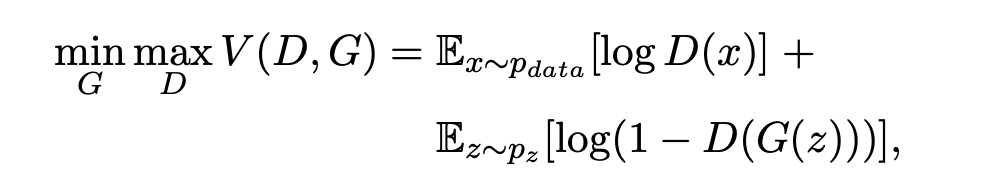

## Generate Text using GAN 

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()


In [ ]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [ ]:
#Digit Generation

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.manual_seed(111)

In [ ]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [ ]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator().to(device=device)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [ ]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

In [ ]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

In [ ]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

# Seq2Seq Model: Text Generation using LSTM

#Boden's Criteria for Creativity

1. Surprise 
2. Useful 
3. Novel 

#Composer-Audience Model 

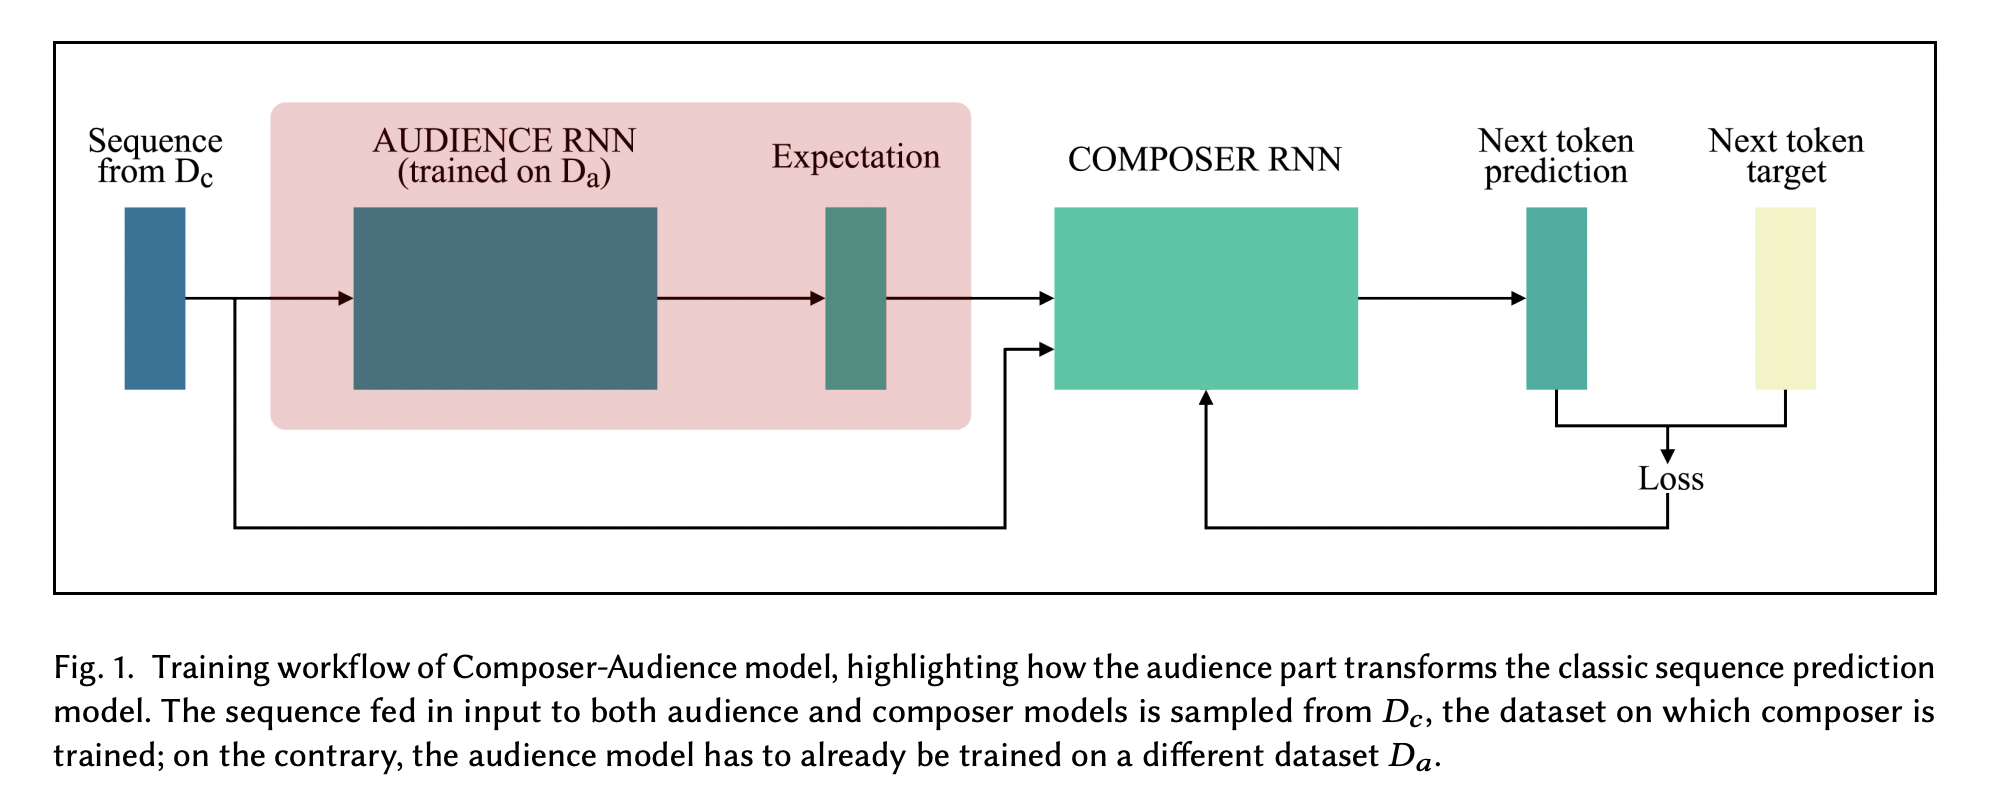

1. Sequence Prediction Model 
2. Designed to Produce Surprise 

a. Audience RNN --> Predict next token
                --> Trained given dataset 
                
b. Composer RNN --> Trained different dataset
                --> Receives expectation from Audience RNN

#Limitation

1. No Novelty 


#Creative Adversarial Network

1. Creativity Oriented 
2. Issue with GAN, generate as close as possible 
3. With Original Dataset 
4. But not creative 

(CAN)

5. Increase Stylistic Ambiguity 
6. Deviations from Style Norm (Novelty)

7. CAN Discriminator -> Art or Not Art 

Issue
1. Surprise is not taken into account

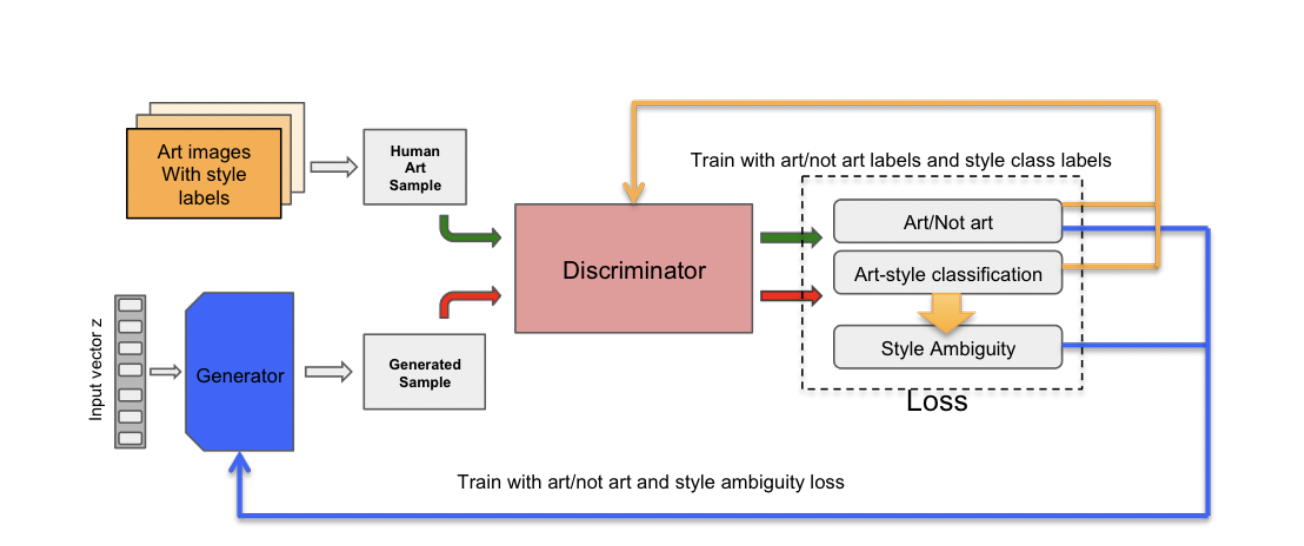

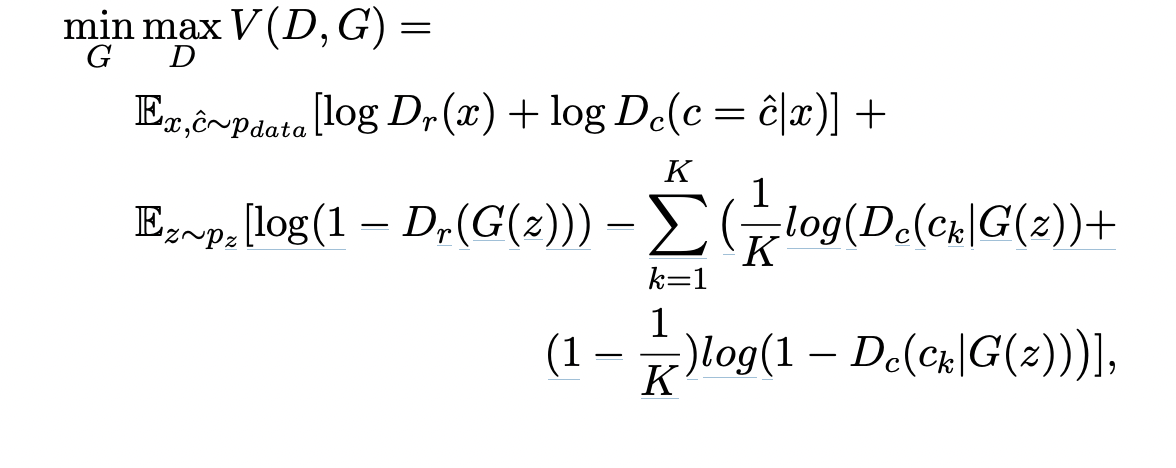

#Schmidhuber's Model 

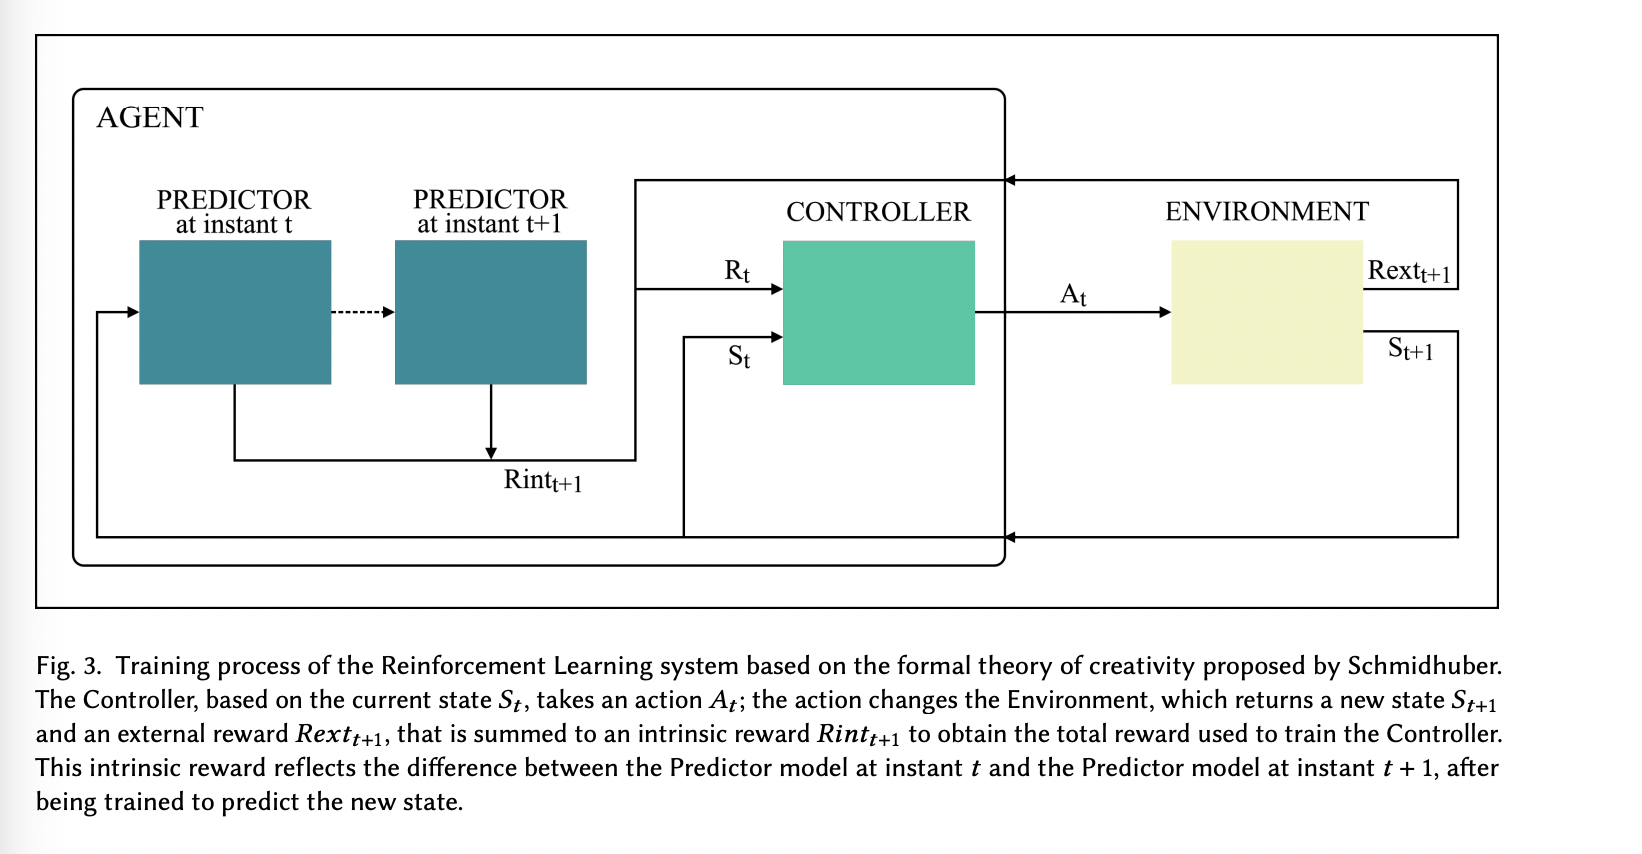

1. Reinforcement Learning 
2. Agent can learn to be Creative 
3. Intrisic Reward to measure novelty
4. Intrisic Reward to measure surprise 
5. Intrisic Reward to measure interestingness

## Two Learning Modules 

1.  an adaptive predictor of the growing data history
2.  When agent is interacting with its environment 
3.  and a controller which acts in the environment

Issue: 
1. Does not include Boden's approach
2. Does not include Value 

#Creative Text Generation using Seq2Seq Model

1. RNN Text Generation
2. LSTM Text Generation 

#Goal: 

Generate Text, which is Novel, Useful, Surprise

1. Novel 
2. Surprise 
3. Useful 


#Transformers




In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
gpt2_generator = pipeline('text-generation', model='gpt2')

In [ ]:
# generate 3 different sentences
# results are sampled from the top 50 candidates
sentences = gpt2_generator("To be honest, neural networks", do_sample=True, top_k=50, temperature=0.6, max_length=128, num_return_sequences=3)
for sentence in sentences:
  print(sentence["generated_text"])
  print("="*50)

#GPT-J Model

In [ ]:
#GPT Model 

#Decoder Only 
#Doesn't use Masking in multi-attention block
#Decoder sees prior words in sentence 
#Takes Word Vectors as Input
#Produces Estimates for probability of next word as output
#Auto-regressive in each sentence 
#

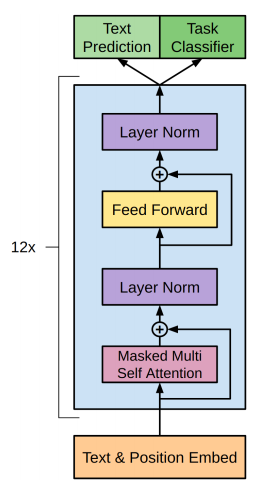

In [ ]:
# download & load GPT-J model! It's 22.5GB in size
gpt_j_generator = pipeline('text-generation', model='EleutherAI/gpt-j-6B')

In [ ]:
# generate sentences with TOP-K sampling
sentences = gpt_j_generator("To be honest, robots will", do_sample=True, top_k=50, temperature=0.6, max_length=128, num_return_sequences=3)
for sentence in sentences:
  print(sentence["generated_text"])
  print("="*50)

#GPT: Tutorial

In [ ]:
!pip install pytorch-transformers

In [ ]:
import torch
from pytorch_transformers import GPT2Tokenizer, GPT2LMHeadModel

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [ ]:
text = "Welcome to the open data science conference it is"
indexed_tokens = tokenizer.encode(text)
indexed_tokens

In [ ]:
tokens_tensor = torch.tensor([indexed_tokens])
tokens_tensor

In [ ]:
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.eval()
model

In [ ]:
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

In [ ]:
predictions.shape

In [ ]:
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
predicted_text

In [ ]:
start = 'Natural Language Processing is slowly becoming'
indexed_tokens = tokenizer.encode(start)

for i in range(75):
  tokens_tensor = torch.tensor([indexed_tokens])
  #tokens_tensor = tokens_tensor.to('cuda')
  with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]
    predicted_index = torch.argmax(predictions[0, -1, :]).item()
    indexed_tokens = indexed_tokens + [predicted_index]

In [ ]:
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
print(predicted_text)

#Use GPT-2 to generate Paragraph

In [ ]:
!git clone http://github.com/huggingface/pytorch-transformers.git

In [ ]:
!python /content/pytorch-transformers/examples/pytorch/text-generation/run_generation.py \
    --model_type=gpt2 \
    --length=500 \
    --model_name_or_path=gpt2 \

#Fine-Tuning GPT-2 

In [ ]:
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

In [ ]:
!nvidia-smi

Sun Aug  7 03:53:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 348Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:01, 572kit/s]
Fetching hparams.json: 1.05Mit [00:00, 547Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [01:18, 6.34Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 384Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:01, 862kit/s]
Fetching vocab.bpe: 1.05Mit [00:01, 861kit/s]


In [ ]:
gpt2.mount_gdrive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name = "shakespeare.txt"

In [ ]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()

In [ ]:
gpt2.copy_file_from_gdrive(file_name)

In [ ]:
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name='124M',
              steps=1000,
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=200,
              save_every=400
              )

In [ ]:
gpt2.copy_checkpoint_to_gdrive(run_name='run1')

FileNotFoundError: ignored

In [ ]:
gpt2.copy_checkpoint_from_gdrive(run_name='run1')

#Generating Text from Trained Model

In [ ]:
gpt2.generate(sess, run_name='run1')

In [ ]:
gpt2.generate(sess,
              length=250,
              temperature=0.7,
              prefix="LORD",
              nsamples=5,
              batch_size=5
              )

#Prompt Generation using GPT2

In [ ]:
#for reproducability
SEED = 34

#maximum number of words in output text
MAX_LEN = 70

In [ ]:
input_sequence = "I don't know about you, but there's only one thing I want to do after a long day of work"

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#get transformers
import transformers
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

#get large GPT2 tokenizer and GPT2 model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-large")
GPT2 = TFGPT2LMHeadModel.from_pretrained("gpt2-large", pad_token_id=tokenizer.eos_token_id)

#tokenizer = GPT2Tokenizer.from_pretrained("gpt2-medium")
#GPT2 = TFGPT2LMHeadModel.from_pretrained("gpt2-medium", pad_token_id=tokenizer.eos_token_id)

#tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
#GPT2 = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

#view model parameters
GPT2.summary()

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2-large.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Model: "tfgpt2lm_head_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 774030080 
 r)                                                              
                                                                 
Total params: 774,030,080
Trainable params: 774,030,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#get deep learning basics
import tensorflow as tf
tf.random.set_seed(SEED)

In [ ]:
# encode context the generation is conditioned on
input_ids = tokenizer.encode(input_sequence, return_tensors='tf')

# generate text until the output length (which includes the context length) reaches 50
greedy_output = GPT2.generate(input_ids, max_length = MAX_LEN)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens = True))

sample_output = greedy_output

Output:
----------------------------------------------------------------------------------------------------
I don't know about you, but there's only one thing I want to do after a long day of work: go to the gym.

I'm not talking about the gym that's right next to my house. I'm talking about the gym that's right next to my office.

I'm not talking about the gym that


In [ ]:
print((tokenizer.decode(sample_output[0])))

I don't know about you, but there's only one thing I want to do after a long day of work: go to the gym.

I'm not talking about the gym that's right next to my house. I'm talking about the gym that's right next to my office.

I'm not talking about the gym that


In [ ]:
sample_output_1 = (tokenizer.decode(sample_output[0]))

#Cosine Similarity

In [ ]:
import numpy as np

In [ ]:
# Initialize numpy vectors
A = np.array([1, 3])
B = np.array([-2, 2])

# Compute dot product
dot_prod = np.dot(A, B)

# Print dot product
print(dot_prod)

In [ ]:
corpus = ['The sun is the largest celestial body in the solar system', 
          'The solar system consists of the sun and eight revolving planets', 
          'Ra was the Egyptian Sun God', 
          'The Pyramids were the pinnacle of Egyptian architecture', 
          'The quick brown fox jumps over the lazy dog']

In [ ]:
sample_output_1

In [ ]:
list_1=sample_output_1.split(",")

In [ ]:
list_2=sample_output_1.split('\n')

In [ ]:
print(list_2)

In [ ]:
print(corpus)

In [ ]:
sample_output_2 = list(str.split(sample_output_1))

In [ ]:
list_2

#Cosine Similiarty

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# compute and print the cosine similarity matrix
cosine_sim_list_2 = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim_list_2)


In [ ]:
similarity_score = cosine_sim_list_2

In [ ]:
type(similarity_score)

In [ ]:
ListAndSimilarityScore = (similarity_score, list_2)
ListAndSimilarityScore_1 = np.vstack(ListAndSimilarityScore)

In [ ]:
ListAndSimilarityScore_1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

In [ ]:
corpus_cosine_sim = cosine_sim

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(list_2)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

In [ ]:
from numpy import ndarray

In [ ]:
print(ndarray.tolist(cosine_sim))

In [ ]:
type(cosine_sim)

In [ ]:
print(corpus_cosine_sim)

In [ ]:
print(list_1)

In [ ]:
print(corpus, cosine_sim)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Random 2D points to make scatter plot
x = [np.random.random() for i in range(len(list_2))]
y = [np.random.random() for i in range(len(list_2))]

fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(111)

colors = plt.cm.rainbow(np.linspace(0, 1, len(list_2)))

for i, j, name in zip(x, y, list_2):
    ax.scatter(i, j, label=name, c=colors[list_2.index(name)])

fig.subplots_adjust(right=0.6)  # This is needed so that the legend is not cut out of the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Random 2D points to make scatter plot
x = [np.random.random() for i in range(len(corpus))]
y = [np.random.random() for i in range(len(corpus))]

fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(111)

colors = plt.cm.rainbow(np.linspace(0, 1, len(corpus)))

for i, j, name in zip(x, y, corpus):
    ax.scatter(i, j, label=name, c=colors[corpus.index(name)])

fig.subplots_adjust(right=0.6)  # This is needed so that the legend is not cut out of the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [ ]:
names = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e']
values = [1, 10, 100, 110, 150]

#Group
plt.figure(figsize=(9, 5))

#Group A
plt.subplot(131)
plt.bar(names, values)

#Group B
plt.subplot(132)
plt.scatter(names, values)


#Group C
plt.subplot(133)
plt.plot(names, values)


#Group D

plt.subplot(132)
plt.bar(names, values)


#Group E

plt.subplot(131)
plt.scatter(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(corpus_cosine_sim)
plt.ylabel('Sentences')
plt.show()

In [ ]:
print(A, B)

In [ ]:
# set return_num_sequences > 1
beam_outputs = GPT2.generate(
    input_ids, 
    max_length = MAX_LEN, 
    num_beams = 5, 
    no_repeat_ngram_size = 2, 
    num_return_sequences = 5, 
    early_stopping = True
)

print('')
print("Output:\n" + 100 * '-')

# now we have 3 output sequences
for i, beam_output in enumerate(beam_outputs):
      print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))

In [ ]:
sample_output_3 = list(beam_output)

In [ ]:
# use temperature to decrease the sensitivity to low probability candidates
sample_output = GPT2.generate(
                             input_ids, 
                             do_sample = True, 
                             max_length = MAX_LEN, 
                             top_k = 0, 
                             temperature = 0.8
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens = True))

In [ ]:
#sample from only top_k most likely words
sample_output = GPT2.generate(
                             input_ids, 
                             do_sample = True, 
                             max_length = MAX_LEN, 
                             top_k = 50
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens = True), '...')

In [ ]:
#sample only from 80% most likely words
sample_output = GPT2.generate(
                             input_ids, 
                             do_sample = True, 
                             max_length = MAX_LEN, 
                             top_p = 0.8, 
                             top_k = 0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens = True), '...')

In [ ]:
#combine both sampling techniques
sample_outputs = GPT2.generate(
                              input_ids,
                              do_sample = True, 
                              max_length = 2*MAX_LEN,                              #to test how long we can generate and it be coherent
                              #temperature = .7,
                              top_k = 50, 
                              top_p = 0.85, 
                              num_return_sequences = 5
)

print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}...".format(i, tokenizer.decode(sample_output, skip_special_tokens = True)))
    print('')

#Prompts

In [ ]:
MAX_LEN = 150

In [ ]:
prompt1 = 'In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.'

input_ids = tokenizer.encode(prompt1, return_tensors='tf')

In [ ]:
sample_outputs = GPT2.generate(
                              input_ids,
                              do_sample = True, 
                              max_length = MAX_LEN,                              #to test how long we can generate and it be coherent
                              #temperature = .8,
                              top_k = 50, 
                              top_p = 0.85 
                              #num_return_sequences = 5
)

print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}...".format(i, tokenizer.decode(sample_output, skip_special_tokens = True)))
    print('')

In [ ]:
# calculate the information for a coin flip
from math import log2
# probability of the event


In [ ]:
p = 1
# calculate information for event
h = -log2(p)
# print the result
print('p(x)=%.3f, information: %.3f bits' % (p, h))

In [ ]:
!pip install prob140

#Generative Models: Creative Function

In [ ]:
# HIDDEN

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [ ]:
from prob140 import *

In [ ]:
dist = Table().domain(make_array(2, 3), np.arange(1, 6, 2))

In [ ]:
dist

In [ ]:
dist = dist.probability([0.1, 0.1, 0.2, 0.3, 0.1, 0.2])

In [ ]:
dist

In [ ]:
dist

#Naive Bayes

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors=np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();
#plt.colorbar();

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

In [ ]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

In [ ]:
def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

In [ ]:
plt.figure()
plt.xlim(-5, 5)
plt.ylim(-15, 5)
plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red")
plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue");

In [ ]:
from sklearn.metrics import accuracy_score
y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print("Accuracy score is", acc)

#Generate data using multivariable normal distribution

In [ ]:
cov=np.array([[ 4.68, -4.32],
 [-4.32,  4.68]])
mean1 = [0,0]
mean2 = [0,4]
n=500
x1 = np.random.multivariate_normal(mean1, cov, n).T
x2 = np.random.multivariate_normal(mean2, cov, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend();

In [ ]:
!pip install exrex

In [ ]:
import numpy as np
import exrex

CHAR_DICTIONARY = ['a','b','c','d','e','f','g','h','i','j','k','l','m',
                    'n','o','p','q','r','s','t','u','v','w','x','y','z',
                    '1','2','3','4','5','6','7','8','9','0','.','@']

def shuffle_data(X, y):
    n = len(X)
    shuffle_idx = np.random.choice(n, size=n, replace=False)
    X = X[shuffle_idx]
    y = y[shuffle_idx]
    return X, y

def generate_email_websites(n=20):
    emails = []
    for i in range(n):
        emails.append(exrex.getone('[a-z0-9]{10}\@[a-z]{5}\.[a-z]{3}'))
    emails = np.asarray(emails)
    
    website_addrs = []
    for i in range(n):
        website_addrs.append(exrex.getone('www\.[a-z0-9]{10}\.[a-z]{3}'))
    website_addrs = np.asarray(website_addrs)

    X = np.concatenate((emails, website_addrs))
    y = np.concatenate((['email']*n, ['website']*n))
    return shuffle_data(X, y)

""" Converts string data into bit vectors (presence/absence of characters) """
def convert_to_bit_vectors(X):
    bit_vectors = []
    for x in X:
        vector = []
        for char in CHAR_DICTIONARY:
            if char in x:
                vector.append(1)
            else:
                vector.append(0)
        bit_vectors.append(np.asarray(vector))
    return np.asarray(bit_vectors)

def generate_simple_data():
    X = np.asarray([[0,0,0,1],
                    [0,0,1,0],
                    [1,0,1,0],
                    [1,1,1,0],
                    [1,0,1,0],
                    [1,1,1,1]])
    y = np.asarray(['spam',
                    'ham',
                    'ham',
                    'ham',
                    'ham',
                    'spam'])
    return X, y

if __name__=='__main__':
    X, y = generate_email_websites()
    print(X[:5], y[:5])
    bits = convert_to_bit_vectors(X)
    print(bits[:4])

#GPT-2 & Cosine Similarity

In [ ]:
#for reproducability
SEED = 34

#maximum number of words in output text
MAX_LEN = 70

input_sequence = "Chennai is located in Southern India in a state called Tamil Nadu. Tamil Nadu is located in"

!pip install transformers




In [ ]:
#Import Transformer

In [ ]:
#get transformers
import transformers
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

#get large GPT2 tokenizer and GPT2 model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-large")
GPT2 = TFGPT2LMHeadModel.from_pretrained("gpt2-large", pad_token_id=tokenizer.eos_token_id)

#tokenizer = GPT2Tokenizer.from_pretrained("gpt2-medium")
#GPT2 = TFGPT2LMHeadModel.from_pretrained("gpt2-medium", pad_token_id=tokenizer.eos_token_id)

#tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
#GPT2 = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

#view model parameters
GPT2.summary()

In [ ]:
#get deep learning basics
import tensorflow as tf
tf.random.set_seed(SEED)
# encode context the generation is conditioned on
input_ids = tokenizer.encode(input_sequence, return_tensors='tf')

# generate text until the output length (which includes the context length) reaches 50
greedy_output = GPT2.generate(input_ids, max_length = MAX_LEN)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens = True))

sample_output = greedy_output

In [ ]:
print((tokenizer.decode(sample_output[0])))

In [ ]:
decode_for_cosine_similiary = (tokenizer.decode(sample_output[0]))

In [ ]:
turn_to_list_cosine_similarity = decode_for_cosine_similiary.split(",")

In [ ]:
turn_to_list_cosine_similarity_1 = decode_for_cosine_similiary.split('\n')

In [ ]:
print(turn_to_list_cosine_similarity_1)

In [ ]:
print(turn_to_list_cosine_similarity_1)

In [ ]:
#Cosine Similarity 



In [ ]:
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(turn_to_list_cosine_similarity_1)

# compute and print the cosine similarity matrix
cosine_sim_list_2 = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim_list_2)

In [ ]:
cosine_sim_list_2

In [ ]:
#Plot Cosine Similiarity 



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6, 7])
ypoints = cosine_sim_list_2

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Random 2D points to make scatter plot
x = [np.random.random() for i in range(len(turn_to_list_cosine_similarity_1))]
y = [np.random.random() for i in range(len(turn_to_list_cosine_similarity_1))]

fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(111)

colors = plt.cm.rainbow(np.linspace(0, 1, len(turn_to_list_cosine_similarity_1)))

for i, j, name in zip(x, y, turn_to_list_cosine_similarity_1):
    ax.scatter(i, j, label=name, c=colors[turn_to_list_cosine_similarity_1.index(name)])

fig.subplots_adjust(right=0.6)  # This is needed so that the legend is not cut out of the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [ ]:
!pip install transformers 

In [ ]:
# Import required libraries
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode a text inputs
text = "What is the fastest car in the"
indexed_tokens = tokenizer.encode(text)

# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

# Get the predicted next sub-word
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
store_predictied_text_2 = predicted_text
# Print the predicted word
print(predicted_text)

In [ ]:
predicted_index_1 = torch.argmax(predictions[0, -1, :]).item()

In [ ]:
predicted_text_1 = tokenizer.decode(indexed_tokens + [predicted_index_1])

In [ ]:
print(predicted_text_1)

In [ ]:
# Import required libraries
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode a text inputs
text = "What is the fastest bike in the"
indexed_tokens = tokenizer.encode(text)

# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

# Get the predicted next sub-word
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])

# Print the predicted word
store_predicted_text_1 = predicted_text
print(predicted_text)

In [ ]:
# Import required libraries
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode a text inputs
text = "Tamil Nadu is located in "
indexed_tokens = tokenizer.encode(text)

# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

# Get the predicted next sub-word
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])

# Print the predicted word
store_predicted_text_3 = predicted_text
print(predicted_text)

In [ ]:
# Import required libraries
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode a text inputs
text = "Beijing is located in "
indexed_tokens = tokenizer.encode(text)

# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

# Get the predicted next sub-word
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])

# Print the predicted word
store_predicted_text_4 = predicted_text
print(predicted_text)

In [ ]:
# Import required libraries
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode a text inputs
text = "Africa is a"
indexed_tokens = tokenizer.encode(text)

# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

# Get the predicted next sub-word
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])

# Print the predicted word
store_predicted_text_5 = predicted_text
print(predicted_text)

In [ ]:
sentences = [store_predicted_text_1, store_predictied_text_2, store_predicted_text_3, store_predicted_text_4, store_predicted_text_5]
print(sentences)

In [ ]:
import pandas as pd 
import sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer(binary=True)
matrix = vectorizer.fit_transform(sentences)
counts = pd.DataFrame(
    matrix.toarray(),
    index=sentences,
    columns=vectorizer.get_feature_names())
counts

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the similarities using the word counts
similarities = cosine_similarity(matrix)

# Make a fancy colored dataframe about it
pd.DataFrame(similarities,
             index=sentences,
             columns=sentences) \
            .style \
            .background_gradient(axis=None)

In [ ]:
pd.DataFrame(similarities)

In [ ]:
Send_for_shaping = pd.DataFrame(similarities, index=sentences, columns=sentences)

In [ ]:
Send_for_shaping

In [ ]:
df_max = Send_for_shaping.max()

In [ ]:
df_max

In [ ]:
print(df_max)

#Softmax

In [ ]:
# transform values into probabilities
from math import exp
# calculate each probability
p1 = exp(1) / (exp(1) + exp(3) + exp(2))
p2 = exp(3) / (exp(1) + exp(3) + exp(2))
p3 = exp(2) / (exp(1) + exp(3) + exp(2))
# report probabilities
print(p1, p2, p3)
# report sum of probabilities
print(p1 + p2 + p3)

In [ ]:

# example of calculating the softmax for a list of numbers
from scipy.special import softmax
# define data
data = [1, 3, 2]
# calculate softmax
result = softmax(data)
# report the probabilities
print(result)
# report the sum of the probabilities
print(sum(result))

In [ ]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)

store_generator= [generator("Hello, I'm Pranay from", max_length=30, num_return_sequences=10)]
store_generator_1 = map(lambda n: "%.2f" % n, store_generator)

generator("Hello, I'm Pranay from", max_length=30, num_return_sequences=10)


In [ ]:
print(store_generator)

In [ ]:
convert = print(store_generator[0][0])

In [ ]:
s = '{0} BLAH BLAH {1} BLAH {2} BLAH BLIH BLEH'
x = ['1', '2', '3']

print(s.format(*x))

In [ ]:
print(s)

In [ ]:
print(store_generator.format(*generated_text))

In [ ]:
{'generated_text': "Hello, I'm Pranay from the Chennai Express. It is so bad that it cannot be repaired, it is so bad that, it must"},
 {'generated_text': "Hello, I'm Pranay from your party, and I wanted to ask if you had any comments or thoughts on some of the interesting aspects of"},
 {'generated_text': "Hello, I'm Pranay from LHC. I work in Microbial Complex. I do the bulk work for my team as well, so"},
 {'generated_text': "Hello, I'm Pranay from the Gondorian Community Center in The City of Boston.\n\nI am currently the Director of Global Communications"},
 {'generated_text': "Hello, I'm Pranay from Pichai and I wanted to introduce you to my favorite dish of all time! Spicy Coconut Curry."},
 {'generated_text': "Hello, I'm Pranay from the Indian Ministry of Home Affairs. Today I am going to ask you for your permission when I present my picture"},
 {'generated_text': 'Hello, I\'m Pranay from Mumbai City." She had a large face and pointed her finger at him. Even though you are now standing here'},
 {'generated_text': "Hello, I'm Pranay from Kolkata, India. I love how much we know about this country, but we don't know all"},
 {'generated_text': "Hello, I'm Pranay from India\n\nI have had one Indian passport. The other card was expired. I'm looking at another."},
 {'generated_text': "Hello, I'm Pranay from Bhopal – an Islamic State affiliate. However, some news stories mentioned it being an affiliate of ISIS and"}]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the similarities using the word counts
similarities = cosine_similarity(matrix)

# Make a fancy colored dataframe about it
pd.DataFrame(similarities,
             index=sentences,
             columns=sentences) \
            .style \
            .background_gradient(axis=None)

In [ ]:
# your code goes here
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import defaultdict
import pickle
import pprint
import random

from timeit import default_timer as timer

text_file = './data/t8.shakespeare.txt'
pa_save_to_cache = True
pa_load_from_cache = False
pa_unigram_cache_file = './pa_unigramsobj.pkl'
pa_bigram_cache_file = './pa_bigramsobj.pkl'

class NGramCollection():
    def __init__(self):
        pass

    @staticmethod
    def get_top_ngrams(ngram_dict, top=15):
        top_vals = []
        for val in range(top):
            item = max(ngram_dict.items(), key=lambda a: a[1])
            top_vals.append(item)
            ngram_dict.pop(item[0])
        return top_vals

class UnigramCollection():

    def __init__(self):
        self.unigrams = defaultdict(int)
        pass

class BigramCollection():

    def __init__(self):
        self.bigrams = defaultdict(int)
        self.bigrams_probs = defaultdict(float)

    def next_token(self, token):
        """ Adds the next token to the bigram collection """
        try:
            new_bigram = (self.previous_word, token)
        except:
            self.previous_word = token
        else:
            self.bigrams[new_bigram] += 1
            self.previous_word = token

    def determine_bigram_probabilities(self, unigram_dict):
        """ Determine the bigram probabilities give the corresponding unigram counts"""
        for key, value in self.bigrams.items():
            self.bigrams_probs[key] = float(value)/float(unigram_dict[key[0]])

    def find_ngram_with_token(self, token):
        """ Retrieve the bigrams with matching prefix """
        matching = []
        for key, value in self.bigrams_probs.items():
            if key[0] == token:
                matching.append((key, value))
        return matching

    def generate_sentence(self):
        """ Generate a sentence from teh bigram collection """

        def normalize_probabilities(probas):
            sum_probs = sum([prob[1] for prob in probas])
            probas = [(val[0], float(val[1])/sum_probs) for val in probas]
            return probas

        def create_prob_ranges(norm_probs):
            """ Create ranges in which probabilities add up to 1 """
            accum_val = 0
            ranges = []
            for pair in norm_probs:
                accum_val += pair[1]
                ranges.append(accum_val)
            return ranges

        sentence = []

        prev_token = START_SENTENCE
        tokens = self.find_ngram_with_token(prev_token)
        # Generate tokens for sentence until end sentence token found
        while prev_token != END_SENTENCE:
            # Sort tokens based on probabilities
            tokens = sorted(tokens, key=lambda tok: tok[1])
            # Normalize token probabilities
            normalized_tokens = normalize_probabilities(tokens)
            # Create 0 - 1 ranges
            prob_ranges = create_prob_ranges(normalized_tokens)

            r = random.random()
            selected_index = len(prob_ranges) - 1
            # Select token that r fell into
            for index, val in enumerate(prob_ranges):
                if r < val:
                    selected_index = index
                    break

            prev_token = tokens[selected_index][0][1]
            sentence.append(prev_token)
            tokens = self.find_ngram_with_token(prev_token)

        # Return sentence items joined by ' ' and without final end sentence tag
        return ' '.join(sentence[:(len(sentence)-1)])


def count_ngrams():
    """
        Code for Part A: reads in text file and makes
        unigram and bigram counts of the words parsed
    """

    unigrams = UnigramCollection()
    bigrams = BigramCollection()

    # Generate unigram and bigram collections from file
    if pa_load_from_cache:
        # Load collections from saved file
        with open(pa_unigram_cache_file, 'rb') as un_f:
            unigrams = pickle.load(un_f)

        with open(pa_bigram_cache_file, 'rb') as bi_f:
            bigrams = pickle.load(bi_f)
    else:
        # Generate collections from raw text file
        tokenizer = RegexpTokenizer(r'\w+')
        with open(text_file, 'r') as f:
            for line in f:
                if len(line) > 0:
                    # Tokenize the line
                    tokens = tokenizer.tokenize(line.lower())
                    # Add tokens to collections
                    for token in tokens:
                        unigrams.unigrams[token] += 1
                        bigrams.next_token(token)
        # Save collections to external file, for future quick load
        if pa_save_to_cache:
            with open(pa_unigram_cache_file, 'wb') as un_f:
                pickle.dump(unigrams, un_f)
            with open(pa_bigram_cache_file, 'wb') as bi_f:
                pickle.dump(bigrams, bi_f)

    print("")
    print("Top 15 unigrams:")
    pprint.pprint(NGramCollection.get_top_ngrams(unigrams.unigrams))
    print("")
    print("Top 15 bigrams:")
    pprint.pprint(NGramCollection.get_top_ngrams(bigrams.bigrams))

########  Code for Part B  #######
from nltk.tokenize import sent_tokenize

pb_load_from_cache = True
pb_save_to_cache = False
pb_unigram_cache_file = './pb_unigramsobj.pkl'
pb_bigram_cache_file = './pb_bigramsobj.pkl'

START_SENTENCE = "<S>"
END_SENTENCE = "</S>"

num_sentences_to_generate = 5

random.seed()

def generate_sentences():

    def parse_grams():
        """
            Populate ngram collections either from raw
            text file or cached files
        """

        # Make lists fo inner functions can assign
        unigrams = [UnigramCollection()]
        bigrams = [BigramCollection()]

        # Generate unigram and bigram collections from file
        if pb_load_from_cache:
            with open(pb_unigram_cache_file, 'rb') as un_f:
                unigrams[0] = pickle.load(un_f)

            with open(pb_bigram_cache_file, 'rb') as bi_f:
                bigrams[0] = pickle.load(bi_f)
        else:
            with open(text_file, 'r') as f:
                # Read the file in sections, the \n\n is a good boundry
                for _, section in enumerate(f.read().split('\n\n')):
                    if len(section) > 0:
                        # Break up the sections into sentences
                        for sentence in sent_tokenize(section.lower()):
                            tokens = word_tokenize(sentence)
                            # Insert start and end sentence tokens
                            tokens.insert(0, START_SENTENCE)
                            tokens.append(END_SENTENCE)
                            for token in tokens:
                                unigrams[0].unigrams[token] += 1
                                bigrams[0].next_token(token)
            # Save collections to cache if desired
            if pb_save_to_cache:
                with open(pb_unigram_cache_file, 'wb') as un_f:
                    pickle.dump(unigrams[0], un_f)
                with open(pb_bigram_cache_file, 'wb') as bi_f:
                    pickle.dump(bigrams[0], bi_f)

        return (unigrams[0], bigrams[0])

    # Get gram collections
    unigrmas_obj, bigrams_obj = parse_grams()

    # Determine bigram probabilities
    bigrams_obj.determine_bigram_probabilities(unigrmas_obj.unigrams)

    # Generate sentences from bigram collection
    for count in range(num_sentences_to_generate):
        print(bigrams_obj.generate_sentence())


if __name__ == '__main__':
    program_time = timer()
    # For part A
    #count_ngrams()

    # For part B
    generate_sentences()


#Output





In [ ]:
#We want Input-Output
#Output is Text Generator, Creative Text 
#Input, any dataset 
#How do we generate creative text? 


In [ ]:
#GPT-2 --> Generate some text 
# Basically, 20 output 
#From the 20 output or sentences
#We want a score 
#From Some Text ---> Creative Text

#Creative Function

How do we build a creative function score? 

Say we have two sentences, we want to output a score between Sentence A vs Sentence B

Firstly, we try to have a similiarity score. 

Creativity is novel + relevance + surprise.

1. Distance (Manhattan or Euclidean or something)
2. Relevance, Useful (Boundary) (Jaccard, overlap coefficient) (Grammar Check)
3. Surprise (Expectation) (Distance) 

1. Distance
2. Relevance (NLTK grammar checker) -- If Grammar is not relevant Output 0
3. Surprise

Combine (1) (2) (3) = Creative-Score

We have similarity score

Output: Similarity Score + 

#Similarity Comparision between Texts

In [ ]:
# Program to measure the similarity between
# two sentences using cosine similarity.
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# X = input("Enter first string: ").lower()
# Y = input("Enter second string: ").lower()
X ="I am from Tamil Nadu"
Y ="I am from Mars"

# tokenization
X_list = word_tokenize(X)
Y_list = word_tokenize(Y)

# sw contains the list of stopwords
sw = stopwords.words('english')
l1 =[];l2 =[]

# remove stop words from the string
X_set = {w for w in X_list if not w in sw}
Y_set = {w for w in Y_list if not w in sw}

# form a set containing keywords of both strings
rvector = X_set.union(Y_set)
for w in rvector:
	if w in X_set: l1.append(1) # create a vector
	else: l1.append(0)
	if w in Y_set: l2.append(1)
	else: l2.append(0)
c = 0

# cosine formula
for i in range(len(rvector)):
		c+= l1[i]*l2[i]
cosine = c / float((sum(l1)*sum(l2))**0.5)
print("similarity: ", cosine)


similarity:  0.4082482904638631


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 53.8 MB/s 
     |████████████████████████████████| 1.3 MB 55.7 MB/s 
     |████████████████████████████████| 120 kB 73.2 MB/s 
     |████████████████████████████████| 6.6 MB 59.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=06e6ea0751608c76bcd4ed2e65978de98422dd7fdf6809d9ac74e84588e0d64c
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

anchor_phrase = "Solving mac computers operating system issues"
candidate_phrases = [
    "Fixing apple OS X errors",
    "Troubleshooting iPhone problems"
]

embeddings = embedder.encode([anchor_phrase] + candidate_phrases)
anchor_embedding = embeddings[0]
candidates = list(zip(candidate_phrases, embeddings[1:]))
candidates = [(x[0], manhattan_distance(anchor_embedding, x[1])) for x in candidates]
print(candidates)

ModuleNotFoundError: ignored

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.3 MB/s 
     |████████████████████████████████| 4.7 MB 61.4 MB/s 
     |████████████████████████████████| 1.3 MB 54.0 MB/s 
     |████████████████████████████████| 120 kB 73.2 MB/s 
     |████████████████████████████████| 6.6 MB 63.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4359445a8e0bec8581fafbe28511dc24f12721b4fae287d0c49d2ffefd6c71ce
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "the person wear red T-shirt",
    "this person is walking",
    "the boy wear red T-shirt"
    ])

print(embeddings)

tf.Tensor(
[[ 0.063188    0.07063895 -0.05998801 ... -0.01409876  0.01863449
   0.01505794]
 [-0.06786215  0.01993553  0.03236153 ...  0.05772103  0.01787272
   0.01740012]
 [ 0.05379307  0.07613157 -0.05256694 ... -0.01256405  0.02131962
  -0.00262439]], shape=(3, 512), dtype=float32)


In [ ]:
!pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 31.8 MB/s 
     |████████████████████████████████| 2.2 MB 46.1 MB/s 
     |████████████████████████████████| 104 kB 5.2 MB/s 


In [ ]:
import math, string, sys, fileinput

def range_bytes (): return range(256)
def range_printable(): return (ord(c) for c in string.printable)
def H(data, iterator=range_bytes):
    if not data:
        return 0
    entropy = 0
    for x in iterator():
        p_x = float(data.count(chr(x)))/len(data)
        if p_x > 0:
            entropy += - p_x*math.log(p_x, 2)
    return entropy

def main ():
    for row in fileinput.input():
        string = row.rstrip('\n')
        print ("%s: %f" % (string, H(string, range_printable)))

for str in ['I am Claude Shannon', 'I am a Claude Shannon']:
    print ("%s: %f" % (str, H(str, range_printable)))

I am Claude Shannon: 3.497156
I am a Claude Shannon: 3.403989


#Value

In [ ]:
!pip install language_tool_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
 
a = "cmputr" # incorrect spelling
print("original text: "+str(a))
 
b = TextBlob(a)
 
# prints the corrected spelling
print("corrected text: "+str(b.correct()))

TypeError: ignored

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 4.7 MB/s 
     |████████████████████████████████| 6.6 MB 35.2 MB/s 
     |████████████████████████████████| 120 kB 70.5 MB/s 


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.8 MB/s 


In [ ]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
import shap
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("gpt2").cuda()

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
# set model decoder to true
model.config.is_decoder=True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2
}

In [ ]:
s = ['Children love Cartoon']

In [ ]:
explainer = shap.Explainer(model, tokenizer)
shap_values = explainer(s)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.


In [ ]:
shap.plots.text(shap_values)

In [ ]:
m = ['Scientists confirmed the worst possible outcome: the massive asteroid will collide with Earth']


In [ ]:
explainer = shap.Explainer(model, tokenizer)
dhap_values = explainer(m)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.


  0%|          | 0/182 [00:00<?, ?it/s]

In [ ]:
shap.plots.text(dhap_values)

In [ ]:
x = [
    "I know many people who are Russian.",
    "I know many people who are Greek.",
    "I know many people who are Australian.",
    "I know many people who are American.",
    "I know many people who are Italian.",
    "I know many people who are Spanish.",
    "I know many people who are German.",
    "I know many people who are Indian."
]

In [ ]:
y = [
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!"
]

In [ ]:
teacher_forcing_model = shap.models.TeacherForcing(model, tokenizer)
masker = shap.maskers.Text(tokenizer, mask_token = "...", collapse_mask_token=True)

In [ ]:
explainer = shap.Explainer(teacher_forcing_model, masker)

In [ ]:
shap_values = explainer(x, y)

Partition explainer: 9it [00:13,  4.39s/it]


In [ ]:
shap.plots.text(shap_values)

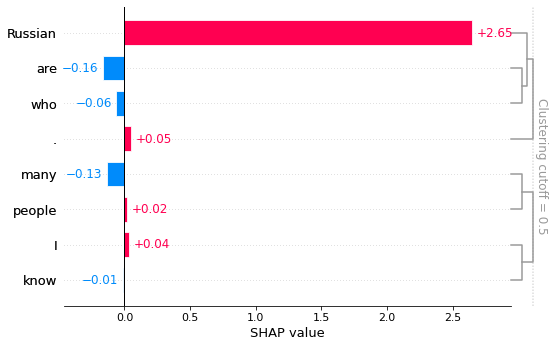

In [ ]:
shap.plots.bar(shap_values[0, :, "vodka"])

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)


All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
# encode context the generation is conditioned on
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='tf')

# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=500)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll 

#Greedy Search:
##a. Generates Repetitive Search

##Beam Search:
##b. Beam Search 

In [ ]:
# activate beam search and early_stopping
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again. I'm not sure if I'll


In [ ]:
# set return_num_sequences > 1
beam_outputs = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    num_return_sequences=5, 
    early_stopping=True
)

# now we have 3 output sequences
print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))


Output:
----------------------------------------------------------------------------------------------------
0: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to take a break
1: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to get back to
2: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with her again.

I've been thinking about this for a while now, and I think it's time for me to take a break
3: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with her again.

I've been thinking about this for a while now, and I think it's time for me to get back to
4: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about 

In [ ]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# activate sampling and deactivate top_k by setting top_k sampling to 0
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))



Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog in Budapest. And the photographs of our Hungarian hosts in Budapest are in no way part of my personal history. My name is Felicity Poration, her photography has been published and celebrated in regular EU magazines and all


In [ ]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# use temperature to decrease the sensitivity to low probability candidates
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0, 
    temperature=0.7
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog and playing with my cats. I love getting out and about in the wild and am happy to share my experience with you."

"Madam President, we are so grateful to you for your kindness in remembering


In [ ]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# set top_k to 50
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=50
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog that loves to lie to me but I have to admit I was very hesitant to tell anyone. Being just a little bit older is enough without getting too carried away like they did in my younger years…

What


In [ ]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# deactivate top_k sampling and sample only from 92% most likely words
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_p=0.92, 
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog—he is very timid and polite and looks good on your pants. We have a normal relationship for about a month, maybe three months, until then he is about every foot long."

In Oakland, it


In [ ]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# set top_k = 50 and set top_p = 0.95 and num_return_sequences = 3
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=50, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=3
)

print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))


Output:
----------------------------------------------------------------------------------------------------
0: I enjoy walking with my cute dog and she likes my dog," she said. "We were driving down Lake Louise and she was really into them. As she walked away, I said, 'I can't stop thinking about this.' She got out
1: I enjoy walking with my cute dog."

Polly loves to run with her friends as often as possible and when she gets her own car she often rides with a friend (Polly's father). When she's too tired to walk with her
2: I enjoy walking with my cute dog as he runs through your house for me, and you're not the only one there," the man said.

Another woman told the ABC affiliate KDVR that she was standing outside her home that night when she


#Creativity

1. Creativity Score
**bold text**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Program to measure the similarity between
# two sentences using cosine similarity.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# X = input("Enter first string: ").lower()
# Y = input("Enter second string: ").lower()
X ="I love horror movies"
Y ="Lights out is a horror movie"

# tokenization
X_list = word_tokenize(X)
Y_list = word_tokenize(Y)

# sw contains the list of stopwords
sw = stopwords.words('english')
l1 =[];l2 =[]

# remove stop words from the string
X_set = {w for w in X_list if not w in sw}
Y_set = {w for w in Y_list if not w in sw}

# form a set containing keywords of both strings
rvector = X_set.union(Y_set)
for w in rvector:
	if w in X_set: l1.append(1) # create a vector
	else: l1.append(0)
	if w in Y_set: l2.append(1)
	else: l2.append(0)
c = 0

# cosine formula
for i in range(len(rvector)):
		c+= l1[i]*l2[i]
cosine = c / float((sum(l1)*sum(l2))**0.5)
print("similarity: ", cosine)


similarity:  0.2886751345948129


In [ ]:
!pip install bayesian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

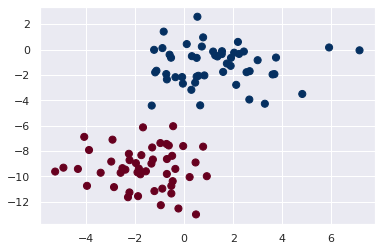

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

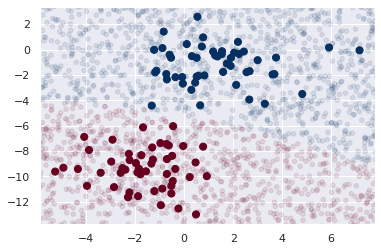

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

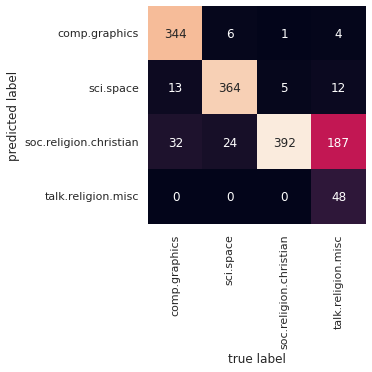

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determining religion')

'soc.religion.christian'

In [ ]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 5.3 MB 17.8 MB/s 
     |████████████████████████████████| 1.3 MB 55.8 MB/s 
     |████████████████████████████████| 163 kB 59.3 MB/s 
     |████████████████████████████████| 7.6 MB 38.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ad658b1daaf04e85e1b228f8703f0cb5ad59fb64842edfae77f1419716eccad5
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
en_1 = model.encode("I like to eat apples")
en_2 = model.encode("I like to eat fruit")

print(type(en_1))

<class 'numpy.ndarray'>


In [ ]:
print(en_1)

[ 1.06147565e-02 -1.43765938e-02 -3.55529808e-03  9.38359946e-02
 -7.26343244e-02 -2.86625214e-02  1.40235156e-01 -6.20395057e-02
  3.32248583e-02  1.96227673e-02  5.03487699e-02 -1.31486028e-01
  1.97830256e-02  1.94572716e-03  3.82734351e-02 -2.80140918e-02
  7.01814070e-02  1.15925055e-02 -3.36902663e-02  1.58302467e-02
 -8.68835896e-02  6.08984269e-02  4.45039794e-02 -1.83519758e-02
 -2.75718160e-02  5.97343147e-02  5.74957766e-02 -4.03135791e-02
 -7.43851587e-02 -1.13508562e-02 -6.43747896e-02 -7.93075282e-03
  2.21646652e-02  2.43047271e-02 -3.74477878e-02 -1.52116874e-02
  1.34419665e-01 -7.10182860e-02 -2.76805721e-02 -7.69447349e-03
  2.18793992e-02  4.61061336e-02  5.41613325e-02  2.21563894e-02
 -7.44832754e-02  6.00423198e-03  6.93566678e-03 -1.77209992e-02
  1.04491822e-01  5.89784309e-02  2.47778334e-02 -7.91545492e-03
 -3.22730280e-02 -4.25690450e-02  5.55260107e-02  5.64126559e-02
 -4.77776350e-03  8.38195533e-03  2.29274835e-02  3.74583155e-03
  8.40005875e-02 -8.20236

#Creativiy Function

1. Sentence Transformer 

In [ ]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 5.3 MB 46.9 MB/s 
     |████████████████████████████████| 1.3 MB 40.8 MB/s 
     |████████████████████████████████| 163 kB 54.1 MB/s 
     |████████████████████████████████| 7.6 MB 43.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c52a053e7e6c5c47318b78bb1d99b3f9f918e29954f131ed88db51615d5ea001
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
en_1 = model.encode("I like to eat apples")
en_2 = model.encode("I like to eat fruit")

print(type(en_1))

<class 'numpy.ndarray'>


In [ ]:
print(en_1.shape)

(384,)


In [ ]:
result = util.cos_sim(en_1, en_2)

print(result)
print(type(result))

tensor([[0.8362]])
<class 'torch.Tensor'>


In [ ]:
result_float = result.item()
print(result_float)
print(type(result_float))

0.836174488067627
<class 'float'>


In [ ]:
result = util.dot_score(en_1, en_2)

print(result.item())

0.836174488067627


#Compare Two Sentences

In [ ]:
sents_1 = ['Go plant an apple tree',
          'I like to run',
          'Can you please pass the pepper']

sents_2 = ['Go plant a pear tree',
           'I like to code',
          'I want to buy new socks']

In [ ]:
em_1 = model.encode(sents_1)
em_2 = model.encode(sents_2)

In [ ]:
cosine_scores = util.cos_sim(em_1, em_2)
print(type(cosine_scores))
print(cosine_scores)

<class 'torch.Tensor'>
tensor([[0.6896, 0.1329, 0.0814],
        [0.1780, 0.4320, 0.1514],
        [0.1659, 0.1660, 0.0806]])


In [ ]:
for i in range(len(sents_1)):
    result = cosine_scores[i][i].item()
    print("sent_1: ", sents_1[i])
    print("sent_2: ", sents_2[i])
    print("result: ", result)
    print(("----------------------------------"))

sent_1:  Go plant an apple tree
sent_2:  Go plant a pear tree
result:  0.6896439790725708
----------------------------------
sent_1:  I like to run
sent_2:  I like to code
result:  0.4319722056388855
----------------------------------
sent_1:  Can you please pass the pepper
sent_2:  I want to buy new socks
result:  0.08064966648817062
----------------------------------


In [ ]:
result

0.08064966648817062

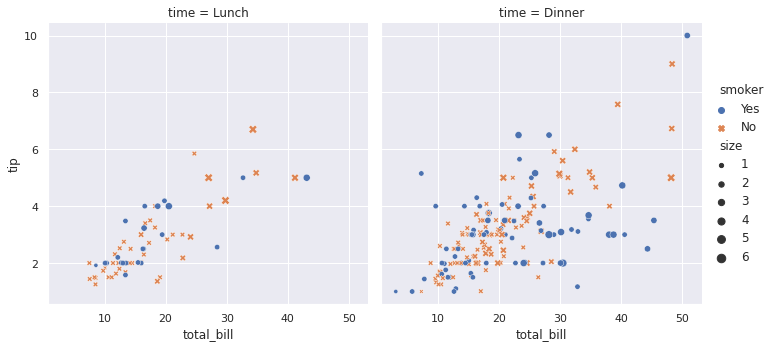

In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
!pip install SentenceTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement SentenceTransformer (from versions: none)
ERROR: No matching distribution found for SentenceTransformer


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
  captured=("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))
  print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))
  
  

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0327
The new movie is awesome 		 The new movie is so great 		 Score: 0.8939


In [ ]:
print(captured)

The new movie is awesome 		 The new movie is so great 		 Score: 0.8939


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')